# Retail Data Analysis Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
trans = pd.read_csv(r'C:\Users\LENOVO\Downloads\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Transactions.csv')
product = pd.read_csv(r'C:\Users\LENOVO\Downloads\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv')
Customer = pd.read_csv(r'C:\Users\LENOVO\Downloads\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Customer.csv')

In [3]:
merge1 = pd.merge(trans,product, how = 'left',left_on=['prod_subcat_code','prod_cat_code'], right_on = ['prod_sub_cat_code','prod_cat_code'])
Customer_Final = pd.merge(merge1, Customer, how = 'left', left_on =['cust_id'], right_on = ['customer_Id'])

In [4]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,22-05-1970,M,2.0


# `Data Preparation`

In [5]:
Customer_Final.duplicated().sum()

13

In [6]:
Customer_Final.drop_duplicates(inplace=True)

In [7]:
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-02-2014' in DD/MM/YYYY format. Provide format or sp

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41744\3904882013.py:2: UserWarning: Parsing '26-09-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41744\3904882013.py:2: UserWarning: Parsing '27-07-1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41744\3904882013.py:2: UserWarning: Parsing '29-05-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41744\3904882013.py:2: UserWarning: Parsing '21-04-1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.DOB =

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41744\3904882013.py:2: UserWarning: Parsing '15-07-1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41744\3904882013.py:2: UserWarning: Parsing '24-10-1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41744\3904882013.py:2: UserWarning: Parsing '23-10-1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41744\3904882013.py:2: UserWarning: Parsing '24-06-1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.DOB =

# 2. Prepare a summary report for the merged data set.

### a. Get the column names and their corresponding data types

In [8]:
Customer_Final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
dtype: object

### b. Top/Bottom 10 observations

In [9]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,272357,1982-09-10,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,275108,1971-04-11,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,269014,1979-11-27,F,3.0


In [269]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,Age
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction,271982,1976-10-08,M,8.0,46
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles,273982,1991-12-10,M,4.0,31
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY,273031,1980-01-17,F,8.0,43
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath,272049,1975-06-28,F,6.0,48
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids,266866,1974-04-18,M,4.0,49
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,1972-02-21,M,7.0,51
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,1984-04-27,M,9.0,39
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,1976-06-20,M,8.0,47
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,1970-05-22,M,2.0,53
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children,271961,1982-01-15,M,1.0,41


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [10]:
Customer_Final.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23040.0,5.006955e+10,2.898062e+10,3268991.000,2.493315e+10,5.009188e+10,7.532632e+10,9.998755e+10
cust_id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05
prod_subcat_code,23040.0,6.148785e+00,3.726197e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23040.0,3.763498e+00,1.677091e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23040.0,2.435764e+00,2.264326e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23040.0,6.370950e+02,6.217274e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23040.0,2.486775e+02,1.871883e+02,7.350,9.828000e+01,1.990800e+02,3.657675e+02,7.875000e+02
total_amt,23040.0,2.109865e+03,2.505610e+03,-8270.925,7.624500e+02,1.756950e+03,3.570255e+03,8.287500e+03
prod_sub_cat_code,23040.0,6.148785e+00,3.726197e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
customer_Id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05


In [11]:
continous_vars = Customer_Final.select_dtypes(['int64','float64'])

In [12]:
continous_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23040.0,5.006955e+10,2.898062e+10,3268991.000,2.493315e+10,5.009188e+10,7.532632e+10,9.998755e+10
cust_id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05
prod_subcat_code,23040.0,6.148785e+00,3.726197e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23040.0,3.763498e+00,1.677091e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23040.0,2.435764e+00,2.264326e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23040.0,6.370950e+02,6.217274e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23040.0,2.486775e+02,1.871883e+02,7.350,9.828000e+01,1.990800e+02,3.657675e+02,7.875000e+02
total_amt,23040.0,2.109865e+03,2.505610e+03,-8270.925,7.624500e+02,1.756950e+03,3.570255e+03,8.287500e+03
prod_sub_cat_code,23040.0,6.148785e+00,3.726197e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
customer_Id,23040.0,2.710219e+05,2.431574e+03,266783.000,2.689350e+05,2.709805e+05,2.731142e+05,2.752650e+05


### d. Frequency tables for all the categorical variables

In [13]:
categorical_vars = Customer_Final.select_dtypes('object')

In [14]:
categorical_vars

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M
...,...,...,...,...
23048,e-Shop,Books,Academic,M
23049,e-Shop,Clothing,Mens,M
23050,MBR,Home and kitchen,Furnishing,M
23051,TeleShop,Books,Children,M


In [15]:
categorical_vars.describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [16]:
con_vars = Customer_Final.loc[:,Customer_Final.dtypes == ('int64','float64')]
con_vars

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,prod_sub_cat_code,customer_Id
0,80712190438,270351,1,1,-5,-772,1,270351
1,29258453508,270384,5,3,-5,-1497,5,270384
2,51750724947,273420,6,5,-2,-791,6,273420
3,93274880719,271509,11,6,-3,-1363,11,271509
4,51750724947,273420,6,5,-2,-791,6,273420
...,...,...,...,...,...,...,...,...
23048,94340757522,274550,12,5,1,1264,12,274550
23049,89780862956,270022,4,1,1,677,4,270022
23050,85115299378,271020,2,6,4,1052,2,271020
23051,72870271171,270911,11,5,3,1142,11,270911


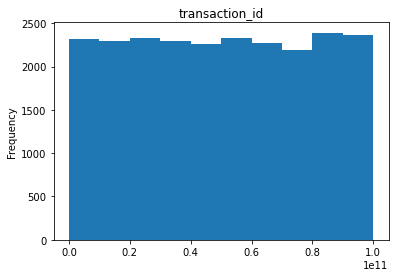

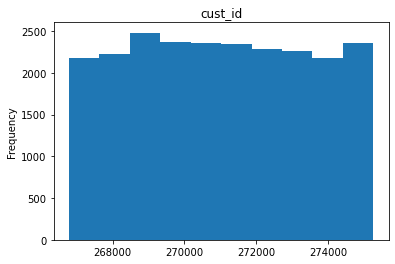

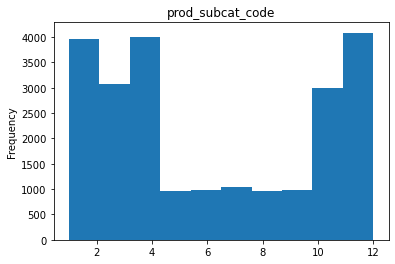

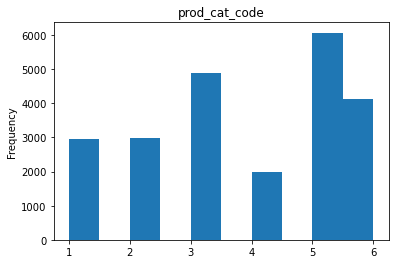

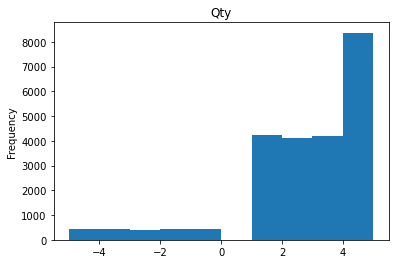

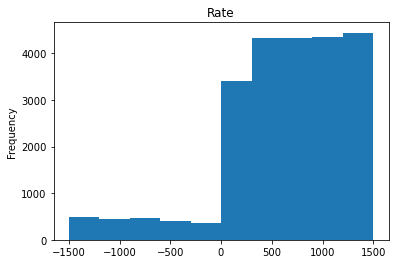

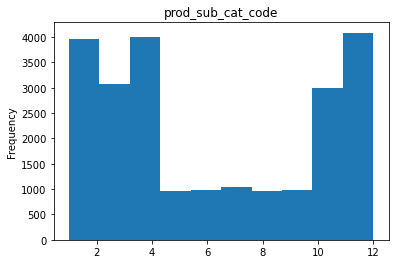

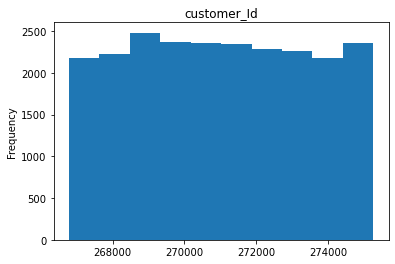

In [17]:
# Method 1:
for i in con_vars:
    con_vars[i].plot(kind = 'hist')
    plt.title(i)
    plt.show()

In [18]:
# Method 2:
for i in lst:
    con_vars[i].plot(kind = 'hist')
    plt.title(i)
    plt.show()
#     print(i)

NameError: name 'lst' is not defined

#### Frequency bars for Categorical Variables

In [19]:
categorical_vars

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M
...,...,...,...,...
23048,e-Shop,Books,Academic,M
23049,e-Shop,Clothing,Mens,M
23050,MBR,Home and kitchen,Furnishing,M
23051,TeleShop,Books,Children,M


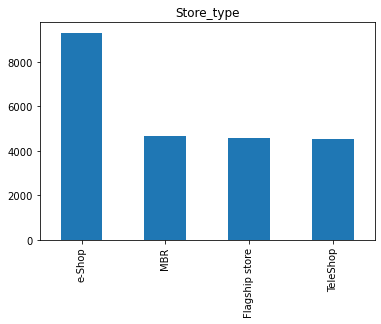

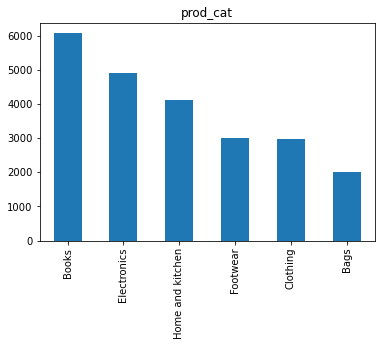

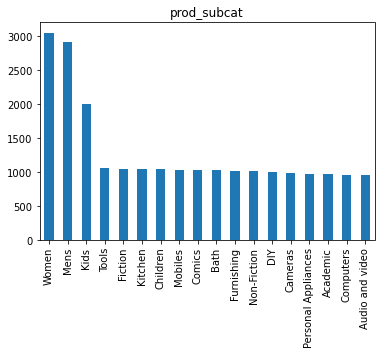

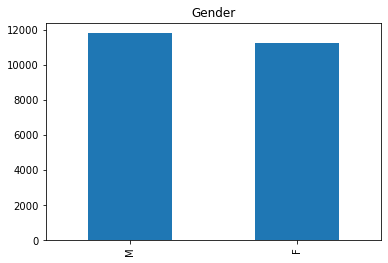

In [20]:
for i in categorical_vars:
    categorical_vars[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

# 5. Analyze which product categories are more popular among females vs male customers.

In [30]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0


In [105]:
Customer_Final.pivot_table(index= 'prod_cat', columns = 'Gender', values = 'Qty', aggfunc = sum)

Gender,F,M
prod_cat,,
Bags,2364,2346
Books,7080,7587
Clothing,3425,3748
Electronics,5832,6486
Footwear,3721,3561
Home and kitchen,4898,5051


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [108]:
City_Code = Customer_Final.groupby(['city_code']).cust_id.count().sort_values(ascending = False)
City_Code

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: cust_id, dtype: int64

In [112]:
percentage = round((City_Code[4.0]/City_Code.sum()) * 100 , 2)


In [113]:
print('City Code 4 has maximum customers and percentage of customers is', percentage)

City Code 4 has maximum customers and percentage of customers is 10.52


# 7. Which store type sells the maximum products by value and by quantity?

In [115]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_sub_cat_code', 'prod_subcat', 'customer_Id', 'DOB',
       'Gender', 'city_code'],
      dtype='object')

In [130]:
Customer_Final.pivot_table(index = 'Store_type' , values = ['Qty', 'Rate'], aggfunc = ['sum'], sort = False)

sum         
                  Qty     Rate
Store_type                    
e-Shop          22790  5945770
TeleShop        10993  2836359
MBR             11195  2953665
Flagship store  11142  2942874

# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [148]:
pvt1 = Customer_Final.pivot_table(index = 'prod_cat', columns = 'Store_type', values = 'total_amt', aggfunc = 'sum')
pvt1

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1617933.265
Books,2493677.810,2496039.195,2545714.470,5297161.155
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107969.825,1978457.195,4429142.770
Footwear,1234806.560,1112163.715,1235719.290,2643215.250
Home and kitchen,1713004.150,1822403.570,1581227.375,3327977.120


In [151]:
pvt1.loc[['Electronics','Clothing'],['Flagship store']]

Store_type,Flagship store
prod_cat,
Electronics,2215136.04
Clothing,1194423.23


# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [152]:
pvt2 = Customer_Final.pivot_table(index = 'prod_cat', columns = 'Gender', values = 'total_amt', aggfunc = 'sum')
pvt2

Gender,F,M
prod_cat,,
Bags,2079618.840,2046722.990
Books,6174590.825,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5711351.620
Footwear,3203155.215,3020200.365
Home and kitchen,4133702.235,4305169.505


In [153]:
pvt2.loc[['Electronics'],'M']

prod_cat
Electronics    5711351.62
Name: M, dtype: float64

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [181]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0


In [187]:
positive_amt_df = Customer_Final.loc[Customer_Final.total_amt > 0,:]
positive_amt_df=positive_amt_df.drop_duplicates(['cust_id','transaction_id'],keep='first')


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,12,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,6,DIY,275023,1971-09-03,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,3,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,7,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,1970-05-22,M,2.0


In [200]:
pvt3 = positive_amt_df.pivot_table(index = 'cust_id', values = 'transaction_id', aggfunc = 'count')
pvt3

,transaction_id
cust_id,
266783,4
266784,3
266785,7
266788,4
266794,11
...,...
275257,4
275261,3
275262,2


In [202]:
pvt3[pvt3['transaction_id'] > 10].count()

transaction_id    6
dtype: int64

## 11. For all customers aged between 25 - 35, find out:
## a. What was the total amount spent for “Electronics” and “Books” product categories?


In [21]:
from datetime import datetime as dt

In [22]:
Customer_Final['Age'] = ((dt.today() - Customer_Final['DOB']).astype('<m8[Y]')).astype(int)
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,Age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,1981-09-26,M,5.0,41
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0,49
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,31
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,1981-08-06,M,3.0,42
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,31


In [252]:
Cust = Customer_Final[Customer_Final['Age'].between(25,35)]

In [254]:
pvt4 = Cust.pivot_table(index = 'prod_cat' , values = 'total_amt', aggfunc = 'sum')

In [255]:
pvt4.loc[['Electronics','Books'],:]

,total_amt
prod_cat,
Electronics,2483476.45
Books,2820678.25


## b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [266]:
Cust2 = Cust[Cust['tran_date'].between('2014-01-01','2014-03-01')]

In [267]:
Cust2.total_amt.sum()

400342.605